In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load Dataset
weather = pd.read_csv("/home/asfandyarkhan/Downloads/Boise1970-Mar2024.csv", index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",10.0,0.0,NaN,NaN,1030.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",60.0,50.0,NaN,NaN,1354.0,0.00,75.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",20.0,0.0,NaN,NaN,1012.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",100.0,100.0,NaN,NaN,330.0,0.07,0.0,1.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",80.0,90.0,NaN,NaN,1448.0,0.00,70.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,12.30,NaN,NaN,0.08,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,7.16,NaN,NaN,0.55,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,6.49,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


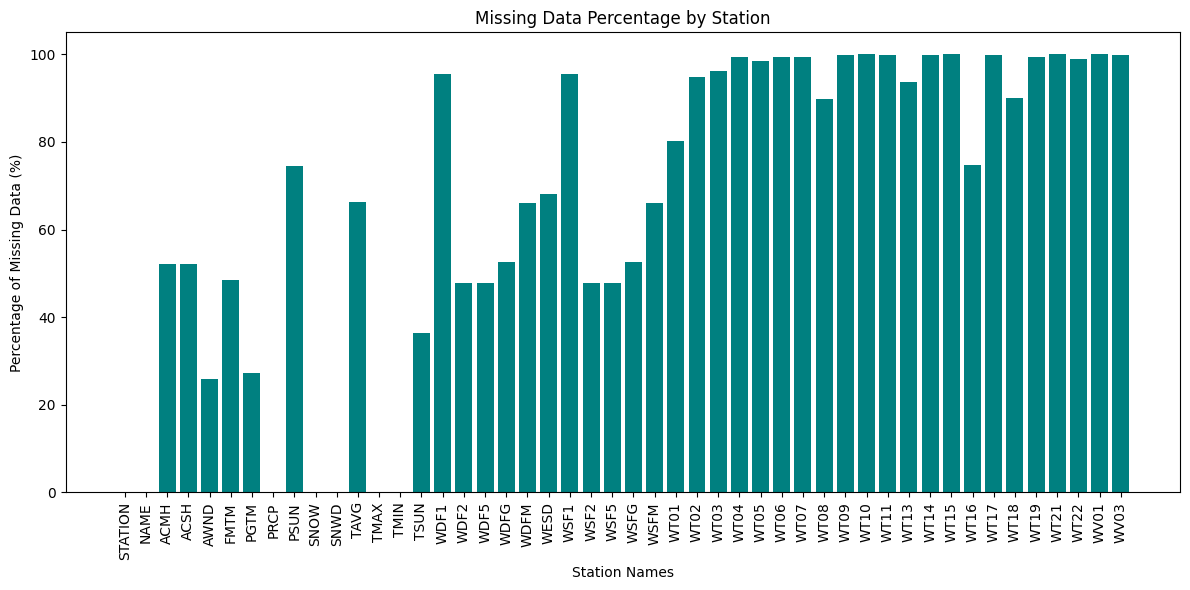

In [365]:
# Calculates the proportion of missing data in each column of the DataFrame
missing_data_percent = weather.apply(pd.isnull).sum() / weather.shape[0] * 100
# Assuming missing_data_percent is correctly calculated and indexed by station names
plt.figure(figsize=(12, 6))  # Adjust size to your preference
plt.bar(missing_data_percent.index, missing_data_percent.values, color='teal')  # Create a bar plot
plt.xlabel('Station Names')  # Label on x-axis
plt.ylabel('Percentage of Missing Data (%)')  # Label on y-axis
plt.title('Missing Data Percentage by Station')  # Title of the plot
plt.xticks(rotation=90)  # Rotate labels on x-axis for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()  # Display the plot

In [366]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-01-01,0.00,0.0,0.0,30,13
1970-01-02,0.00,0.0,0.0,33,17
1970-01-03,0.00,0.0,0.0,34,17
1970-01-04,0.07,1.4,0.0,26,19
1970-01-05,0.00,0.0,1.0,27,12
...,...,...,...,...,...
2024-03-27,0.08,0.0,0.0,57,37
2024-03-28,0.55,0.0,0.0,52,37
2024-03-29,0.00,0.0,0.0,58,35


In [367]:
# del core_weather["snow"]
# del core_weather["snow_depth"]
# core_weather

In [368]:
# Calculate the number of missing values in each specified column
missing_counts = core_weather[["precip", "snow",  "temp_max", "snow_depth", "temp_min"]].isnull().sum()
# Print the count of missing values
print(f"The number of rows with missing data is: {missing_counts}")

The number of rows with missing data is: precip        0
snow          0
temp_max      0
snow_depth    0
temp_min      0
dtype: int64


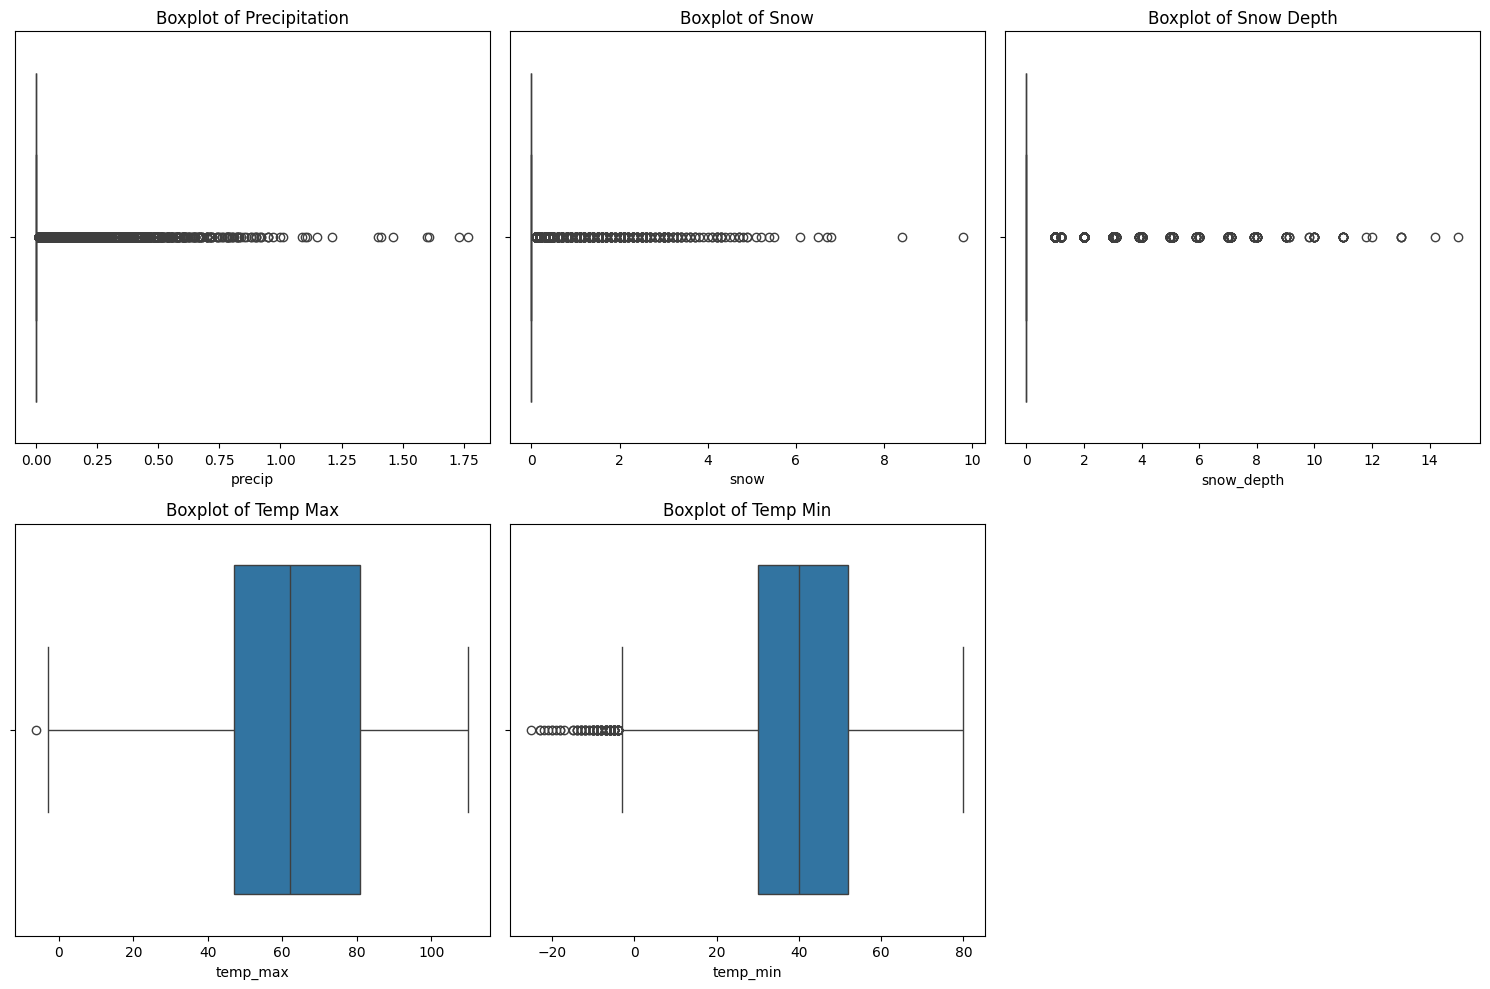

In [369]:
# Assuming 'filtered_data' is your DataFrame that includes all the columns of interest
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary

# Boxplot for 'precip'
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
sns.boxplot(data=core_weather, x='precip')
plt.title('Boxplot of Precipitation')

# Boxplot for 'snow'
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
sns.boxplot(data=core_weather, x='snow')
plt.title('Boxplot of Snow')

# Boxplot for 'snow_depth'
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
sns.boxplot(data=core_weather, x='snow_depth')
plt.title('Boxplot of Snow Depth')

# Boxplot for 'temp_max'
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 4
sns.boxplot(data=core_weather, x='temp_max')
plt.title('Boxplot of Temp Max')

# Boxplot for 'temp_min'
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 5
sns.boxplot(data=core_weather, x='temp_min')
plt.title('Boxplot of Temp Min')

plt.tight_layout()  # Adjust subplots to fit into figure area nicely
plt.show()

In [370]:
def remove_outliers(df, column, multiplier=1.5):
    # Exclude the last 20 days for outlier detection and removal
    training_data = df.iloc[:-20]
    test_data = df.iloc[-20:]
    
    Q1 = training_data[column].quantile(0.25)
    Q3 = training_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Apply the filter on the training part only
    filtered_training_data = training_data[(training_data[column] >= lower_bound) & (training_data[column] <= upper_bound)]
    
    # Combine back the untouched test data
    combined_data = pd.concat([filtered_training_data, test_data])

    initial_row_count = training_data.shape[0]
    final_row_count = filtered_training_data.shape[0]
    print(f"Outliers removed from {column}: {initial_row_count - final_row_count}")
    print(f"Rows remaining in training set: {final_row_count}")

    # Return both the combined data and the number of outliers removed
    return combined_data, initial_row_count - final_row_count

# Apply to the dataset
columns_to_check = ["temp_max", "temp_min"]  # Or any other columns you're interested in
filtered_data = core_weather.copy()
total_outliers = 0

for column in columns_to_check:
    filtered_data, num_outliers_removed = remove_outliers(filtered_data, column)
    total_outliers += num_outliers_removed

print(f"Total outliers removed across columns: {total_outliers}")


Outliers removed from temp_max: 1
Rows remaining in training set: 19793
Outliers removed from temp_min: 85
Rows remaining in training set: 19708
Total outliers removed across columns: 86


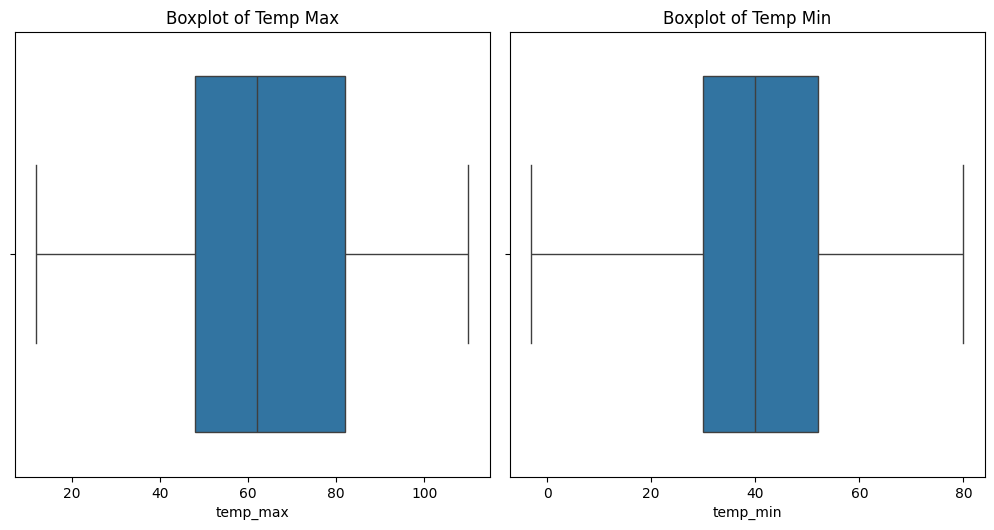

In [371]:
# Assuming 'filtered_data' is your DataFrame that includes all the columns of interest
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary
# Boxplot for 'temp_max'
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 4
sns.boxplot(data=filtered_data, x='temp_max')
plt.title('Boxplot of Temp Max')

# Boxplot for 'temp_min'
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 5
sns.boxplot(data=filtered_data, x='temp_min')
plt.title('Boxplot of Temp Min')

plt.tight_layout()  # Adjust subplots to fit into figure area nicely
plt.show()

In [372]:
filtered_df_last_20_days = core_weather.tail(20)
print(filtered_df_last_20_days)

            precip  snow  snow_depth  temp_max  temp_min
DATE                                                    
2024-03-12    0.07   0.0         0.0        56        40
2024-03-13    0.00   0.0         0.0        49        32
2024-03-14    0.00   0.0         0.0        57        26
2024-03-15    0.00   0.0         0.0        59        29
2024-03-16    0.00   0.0         0.0        63        34
2024-03-17    0.00   0.0         0.0        67        39
2024-03-18    0.00   0.0         0.0        70        39
2024-03-19    0.00   0.0         0.0        71        40
2024-03-20    0.00   0.0         0.0        72        41
2024-03-21    0.00   0.0         0.0        63        47
2024-03-22    0.00   0.0         0.0        67        45
2024-03-23    0.41   0.0         0.0        60        38
2024-03-24    0.00   0.0         0.0        55        40
2024-03-25    0.00   0.0         0.0        53        33
2024-03-26    0.05   0.0         0.0        53        32
2024-03-27    0.08   0.0       

In [373]:
# Calculate the number of missing values in each specified column
missing_counts = core_weather[["precip", "snow",  "temp_max", "snow_depth", "temp_min"]].isnull().sum()
# Print the count of missing values
print(f"The number of rows with missing data is: {missing_counts}")

The number of rows with missing data is: precip        0
snow          0
temp_max      0
snow_depth    0
temp_min      0
dtype: int64


In [374]:
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min
DATE                                                    
1970-01-01    0.00   0.0         0.0        30        13
1970-01-02    0.00   0.0         0.0        33        17
1970-01-03    0.00   0.0         0.0        34        17
1970-01-04    0.07   1.4         0.0        26        19
1970-01-05    0.00   0.0         1.0        27        12
...            ...   ...         ...       ...       ...
2024-03-27    0.08   0.0         0.0        57        37
2024-03-28    0.55   0.0         0.0        52        37
2024-03-29    0.00   0.0         0.0        58        35
2024-03-30    0.00   0.0         0.0        60        41
2024-03-31    0.00   0.0         0.0        60        35

[19728 rows x 5 columns]


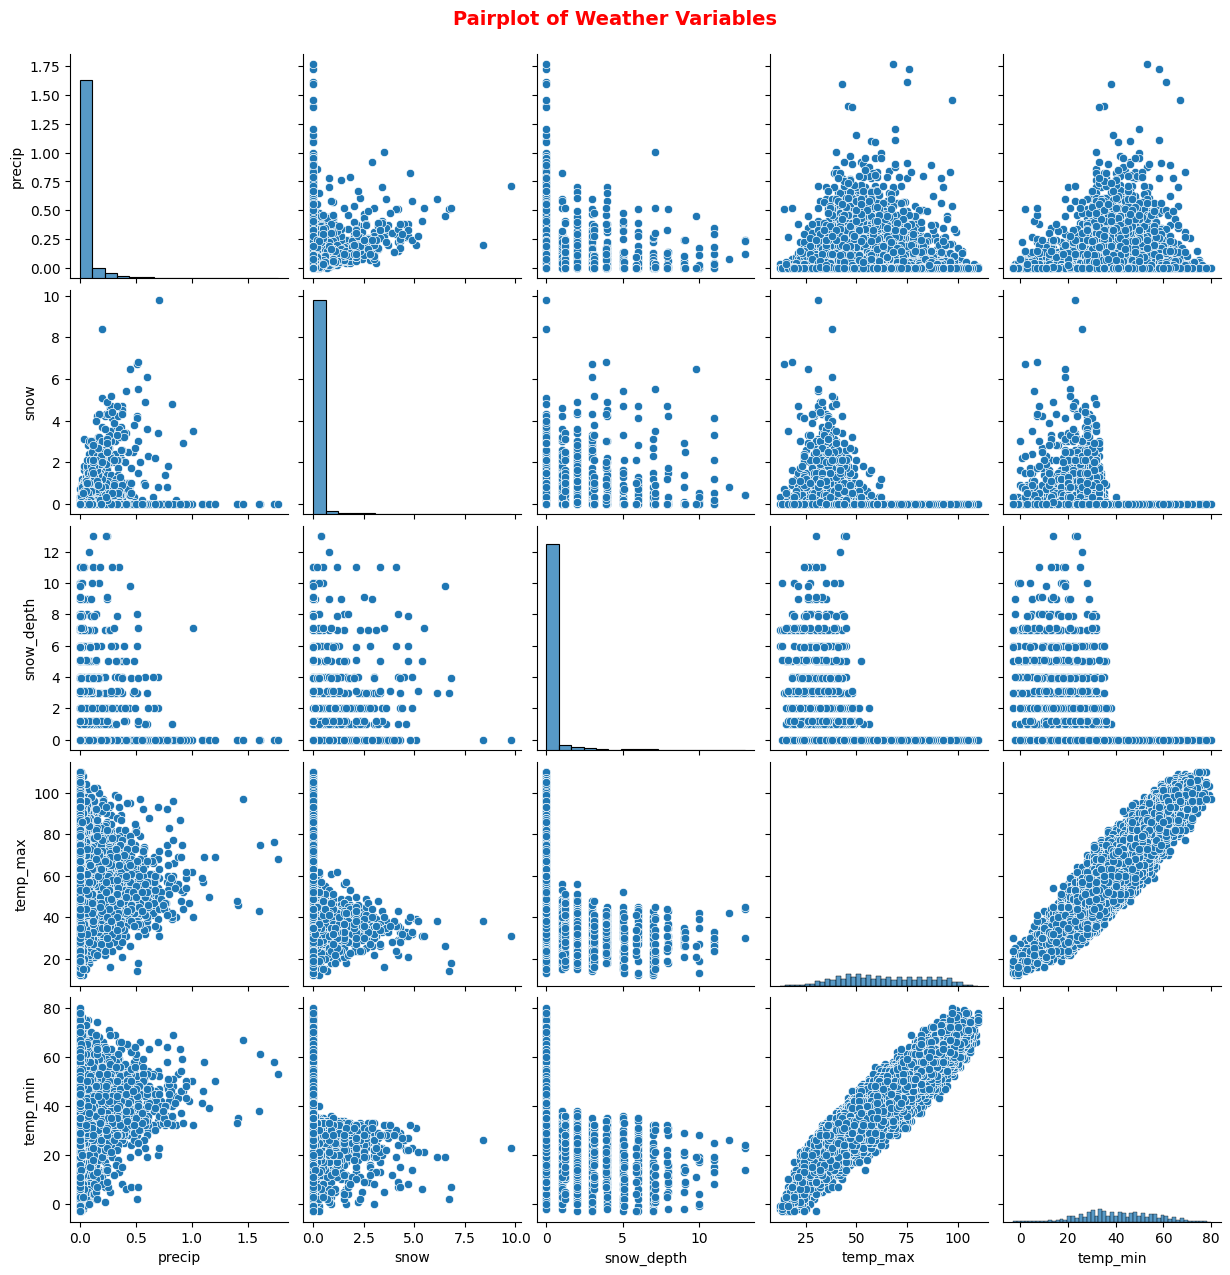

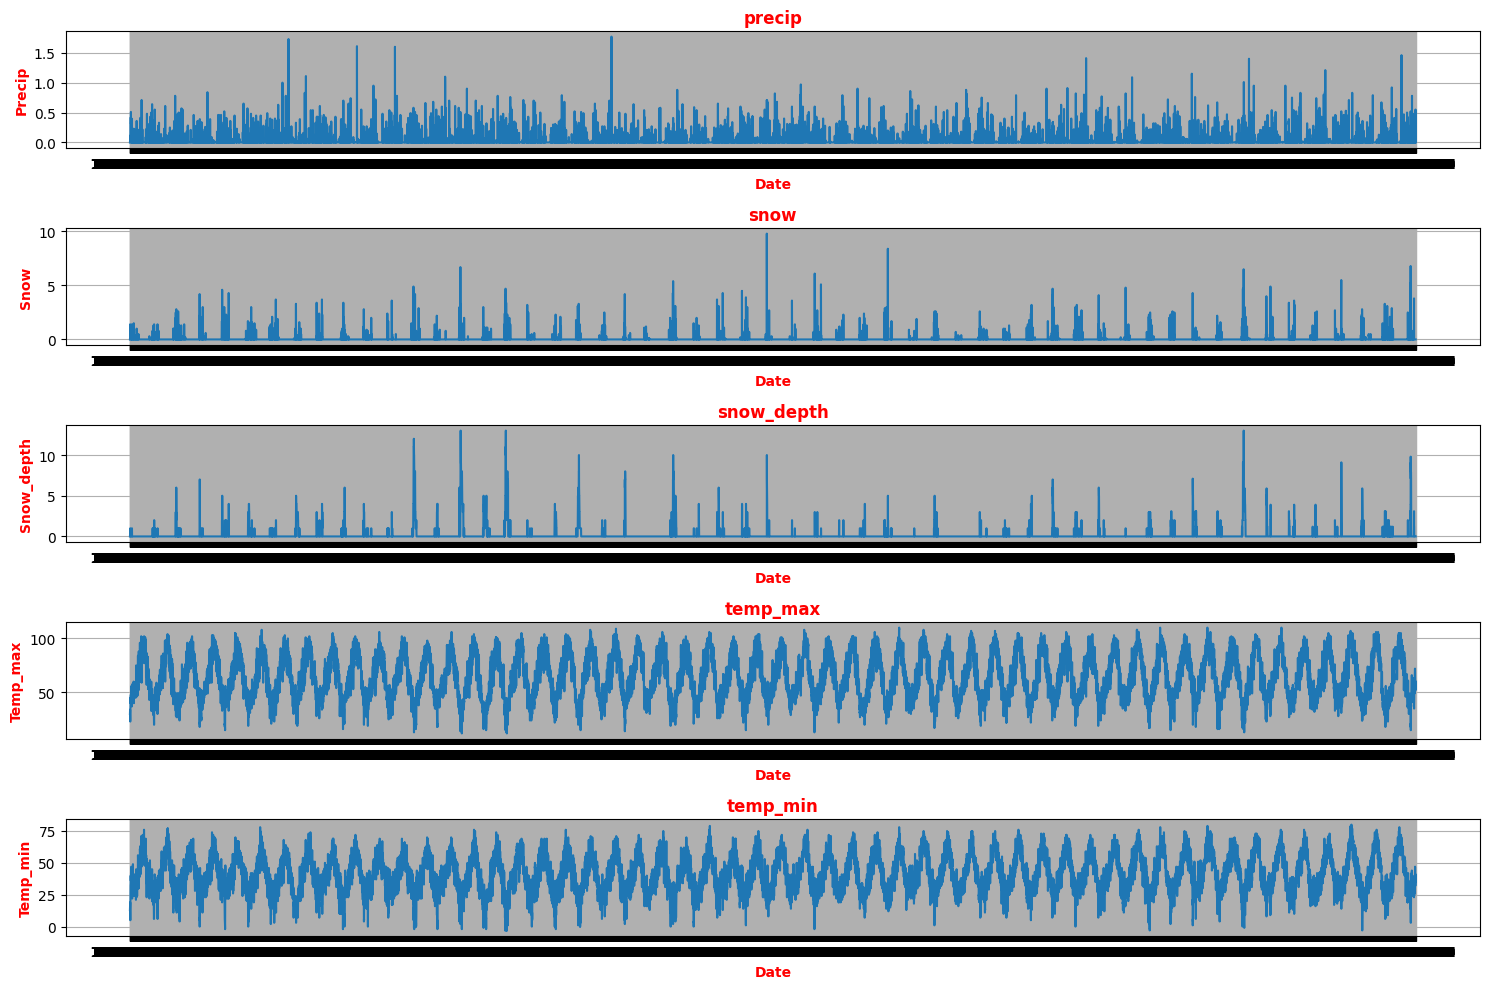

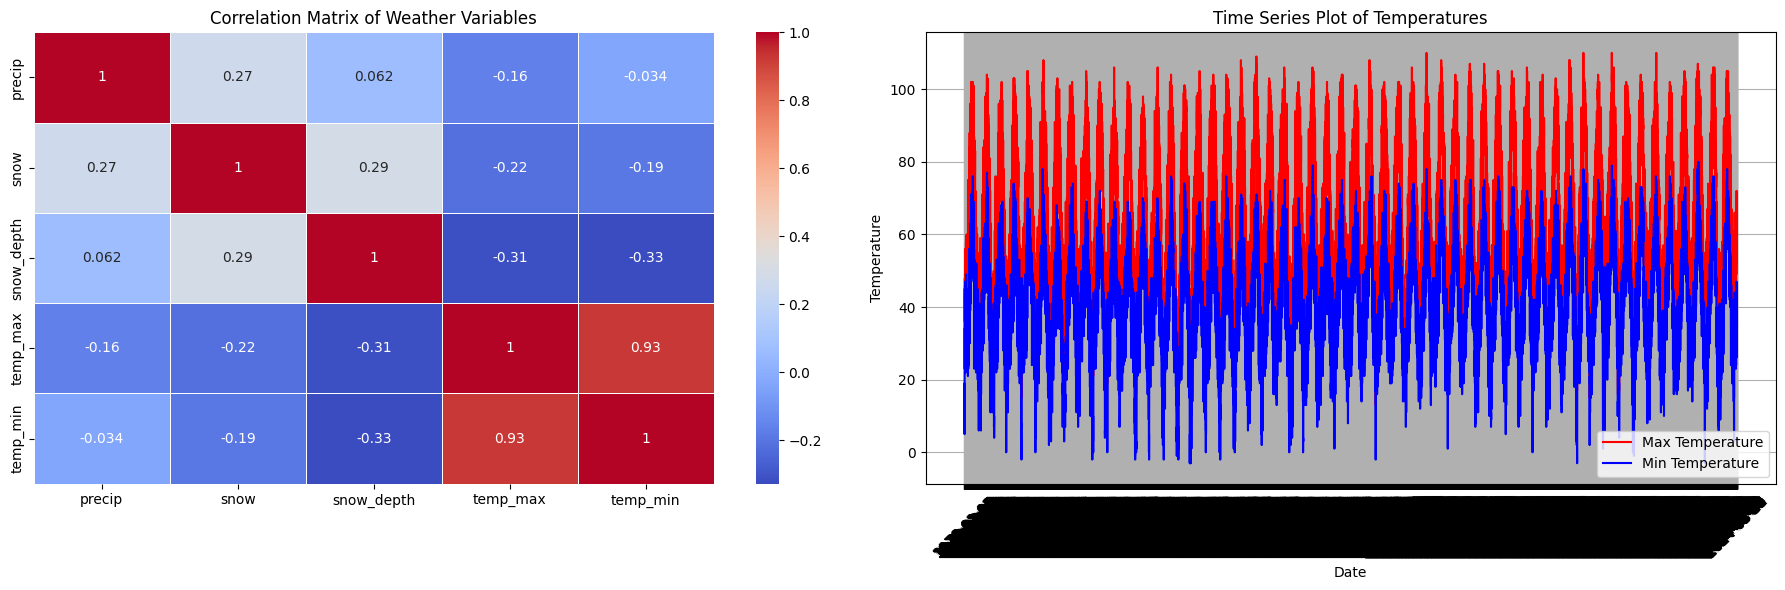

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' is your DataFrame and 'target' is the column to exclude
data_for_visualization = filtered_data.copy()

# Pair plot to explore relationships between continuous variables
sns.pairplot(data_for_visualization)
plt.suptitle("Pairplot of Weather Variables", y=1.02, fontsize=14, color='red', weight='bold')  # Bold and red title
plt.show()

# Time series plot for each variable over time
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_for_visualization.columns, 1):
    plt.subplot(len(data_for_visualization.columns), 1, i)
    plt.plot(data_for_visualization.index, data_for_visualization[column])
    plt.title(column, color='red', weight='bold')  # Bold and red title for each subplot
    plt.xlabel('Date', color='red', weight='bold')  # Bold and red X-axis label
    plt.ylabel(column.capitalize(), color='red', weight='bold')  # Bold and red Y-axis label
    plt.grid(True)
plt.tight_layout()
plt.show()

# Create a figure and a set of subplots
plt.figure(figsize=(18, 6))

# Plot 1: Correlation matrix heatmap
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
correlation_matrix = data_for_visualization.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables")

# Plot 2: Time Series Plot of Temperatures
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(data_for_visualization.index, data_for_visualization['temp_max'], label='Max Temperature', color='red')
plt.plot(data_for_visualization.index, data_for_visualization['temp_min'], label='Min Temperature', color='blue')
plt.title("Time Series Plot of Temperatures")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [376]:
# Transforms the index of the core_weather DataFrame into a DateTimeIndex
filtered_data.index = pd.to_datetime(filtered_data.index)
filtered_data.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=19728)

In [377]:
filtered_data.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    357
1973    365
1974    363
1975    364
1976    366
1977    360
1978    364
1979    355
1980    364
1981    365
1982    364
1983    359
1984    360
1985    350
1986    365
1987    365
1988    365
1989    359
1990    357
1991    359
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    363
2010    365
2011    365
2012    366
2013    363
2014    365
2015    365
2016    366
2017    362
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024     91
Name: count, dtype: int64

In [378]:
#setting up the "target" column in this way, each row in the DataFrame can be used to train a model where the features are
#the current day's weather measurements, and the target is the next day's maximum temperature.
filtered_data["target"] = filtered_data.shift(-1)["temp_max"]
# modifies the core_weather DataFrame by removing the last row
filtered_data = filtered_data.iloc[:-1,:].copy()
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min  target
DATE                                                            
1970-01-01    0.00   0.0         0.0        30        13    33.0
1970-01-02    0.00   0.0         0.0        33        17    34.0
1970-01-03    0.00   0.0         0.0        34        17    26.0
1970-01-04    0.07   1.4         0.0        26        19    27.0
1970-01-05    0.00   0.0         1.0        27        12    23.0
...            ...   ...         ...       ...       ...     ...
2024-03-26    0.05   0.0         0.0        53        32    57.0
2024-03-27    0.08   0.0         0.0        57        37    52.0
2024-03-28    0.55   0.0         0.0        52        37    58.0
2024-03-29    0.00   0.0         0.0        58        35    60.0
2024-03-30    0.00   0.0         0.0        60        41    60.0

[19727 rows x 6 columns]


In [379]:
filtered_data

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,0.0,30,13,33.0
1970-01-02,0.00,0.0,0.0,33,17,34.0
1970-01-03,0.00,0.0,0.0,34,17,26.0
1970-01-04,0.07,1.4,0.0,26,19,27.0
1970-01-05,0.00,0.0,1.0,27,12,23.0
...,...,...,...,...,...,...
2024-03-26,0.05,0.0,0.0,53,32,57.0
2024-03-27,0.08,0.0,0.0,57,37,52.0
2024-03-28,0.55,0.0,0.0,52,37,58.0


Best alpha value for iteration 1: 1e-10
206/206 [==============================] - 0s 415us/step
MSE - Linear: 41.04, Ridge: 41.04, NN: 43.71
MAE - Linear: 4.97, Ridge: 4.97, NN: 5.22


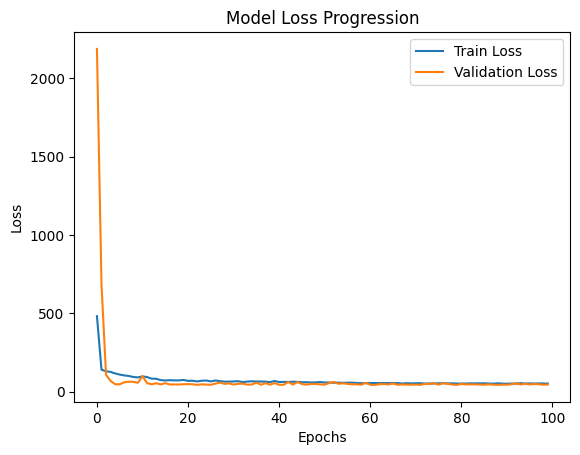

In [380]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.dates as mdates
from sklearn.model_selection import GridSearchCV


# Define the number of repetitions
n_repeats = 1  # For demonstration, let's just do one iteration

# Data Preparation
#X = filtered_data.drop('target', axis=1)  # All features except target 
X = filtered_data[['temp_max', 'temp_min']]  # Only temperature features

y = filtered_data['target']

# Metrics storage
metrics = {}

for i in range(n_repeats):
    # Random state for reproducibility on the last iteration
    random_state = np.random.randint(10000) if i < n_repeats - 1 else 42
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=2/3, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_pred_lr = linear_model.predict(X_test_scaled)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)

    # Ridge Regression
        # Ridge Regression with Grid Search for Alpha
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ])
    alpha_values = np.logspace(-10, 10, 500)  # Adjust the range based on your specific needs
    param_grid = {'ridge__alpha': alpha_values}
    grid_search = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5)
    grid_search.fit(X_train, y_train)
    best_alpha = grid_search.best_params_['ridge__alpha']
    print(f"Best alpha value for iteration {i+1}: {best_alpha}")

    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val))
    y_pred_nn = nn_model.predict(X_test_scaled).flatten()
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    mae_nn = mean_absolute_error(y_test, y_pred_nn)

    # Store metrics
    metrics['MSE'] = [mse_lr, mse_ridge, mse_nn]
    metrics['MAE'] = [mae_lr, mae_ridge, mae_nn]

    # Prepare results for the last iteration
    if i == n_repeats - 1:
        results_df = pd.DataFrame({
            'Actual Temperature': y_test,
            'Linear Regression': y_pred_lr,
            'Ridge Regression': y_pred_ridge,
            'Neural Network': y_pred_nn
        }, index=X_test.index).sort_index()

    cutoff_year = pd.to_datetime("today").year - 5

# Print metrics
print("MSE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(*metrics['MSE']))
print("MAE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(*metrics['MAE']))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


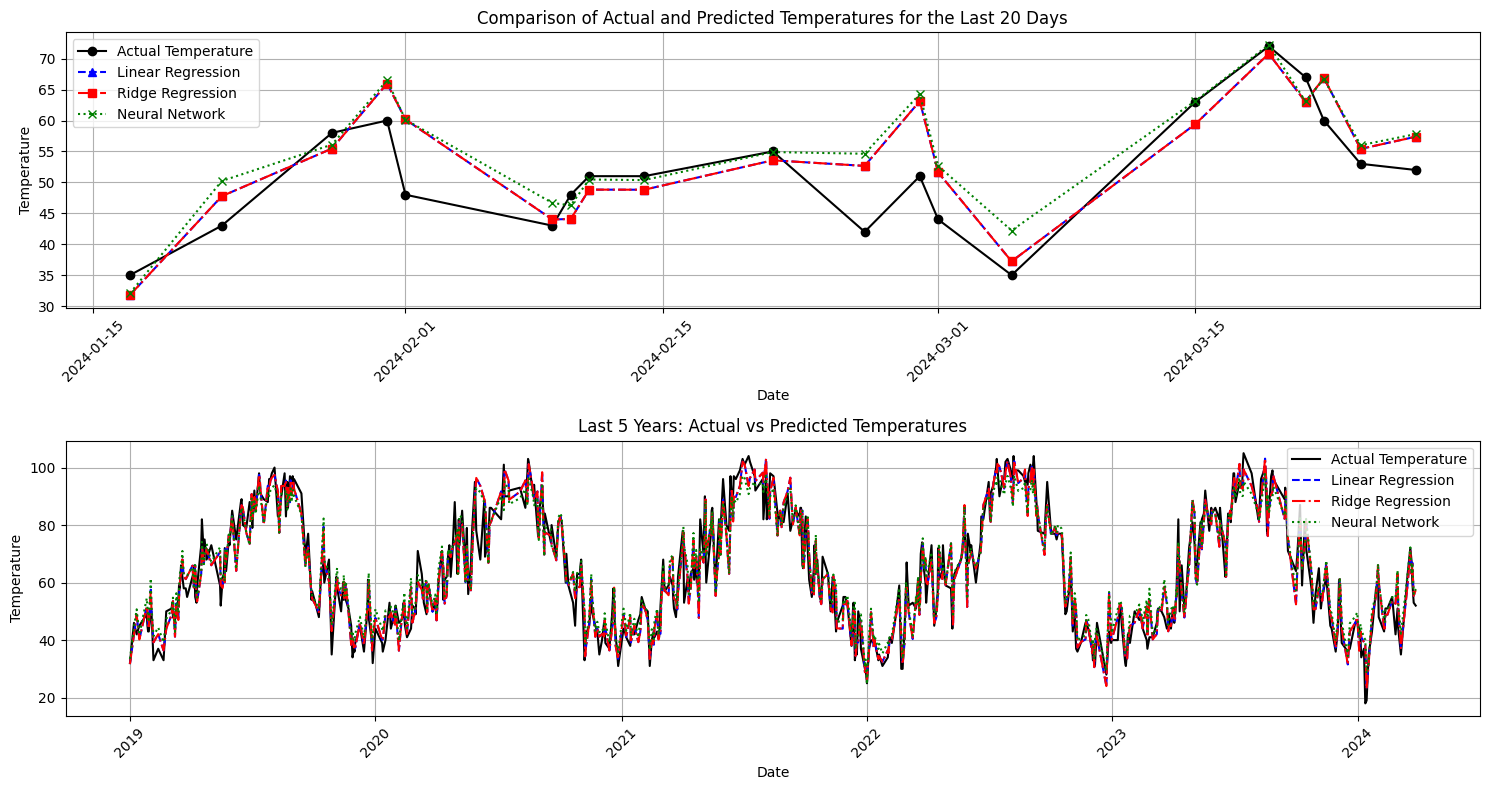

In [381]:
# Plotting
# Plotting the results for the last 10 days from the results dataframe
last_20_days = results_df.tail(20)
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)  # First subplot for initial 20 days
plt.plot(last_20_days.index, last_20_days['Actual Temperature'], label='Actual Temperature', color='black', marker='o', linestyle='-')
plt.plot(last_20_days.index, last_20_days['Linear Regression'], label='Linear Regression', color='blue', marker='^', linestyle='--')
plt.plot(last_20_days.index, last_20_days['Ridge Regression'], label='Ridge Regression', color='red', marker='s', linestyle='-.')
plt.plot(last_20_days.index, last_20_days['Neural Network'], label='Neural Network', color='green', marker='x', linestyle=':')
plt.title('Comparison of Actual and Predicted Temperatures for the Last 20 Days')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.subplot(2, 1, 2)  # Second subplot for last 5 years
last_5_years_df = results_df[results_df.index.year >= cutoff_year]
plt.plot(last_5_years_df.index, last_5_years_df['Actual Temperature'], label='Actual Temperature', color='black')
plt.plot(last_5_years_df.index, last_5_years_df['Linear Regression'], label='Linear Regression', color='blue', linestyle='--')
plt.plot(last_5_years_df.index, last_5_years_df['Ridge Regression'], label='Ridge Regression', color='red', linestyle='-.')
plt.plot(last_5_years_df.index, last_5_years_df['Neural Network'], label='Neural Network', color='green', linestyle=':')
plt.title('Last 5 Years: Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [382]:
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min  target
DATE                                                            
1970-01-01    0.00   0.0         0.0        30        13    33.0
1970-01-02    0.00   0.0         0.0        33        17    34.0
1970-01-03    0.00   0.0         0.0        34        17    26.0
1970-01-04    0.07   1.4         0.0        26        19    27.0
1970-01-05    0.00   0.0         1.0        27        12    23.0
...            ...   ...         ...       ...       ...     ...
2024-03-26    0.05   0.0         0.0        53        32    57.0
2024-03-27    0.08   0.0         0.0        57        37    52.0
2024-03-28    0.55   0.0         0.0        52        37    58.0
2024-03-29    0.00   0.0         0.0        58        35    60.0
2024-03-30    0.00   0.0         0.0        60        41    60.0

[19727 rows x 6 columns]


In [383]:
import pandas as pd
import numpy as np

# Assuming 'filtered_data' is your DataFrame and has a date index
data = filtered_data.copy()
data.index.name = 'DATE'  # Ensure the index name is explicitly set
data['day_of_year'] = data.index.dayofyear

# Calculate the average of each feature for each day of the year
daily_averages = data.groupby('day_of_year')[['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']].mean()

# Prepare future dates
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=18, freq='D')
future_data = pd.DataFrame(index=future_dates)
future_data.index.name = 'DATE'  # Set the index name for the future data

# Fill future data with averages from corresponding days
future_data['day_of_year'] = future_data.index.dayofyear
for col in ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']:
    future_data[col] = future_data['day_of_year'].apply(lambda x: daily_averages.loc[x, col] if x in daily_averages.index else daily_averages.mean()[col])

# Assuming target is the temperature of the next day, similar to 'temp_max' of the current day
future_data['target'] = future_data['temp_max'].shift(-1)

# Drop the helper column 'day_of_year'
future_data.drop(columns=['day_of_year'], inplace=True)

# Combine original and future data
combined_data = pd.concat([filtered_data, future_data[:-1]])  # Exclude the last row without a target
combined_data.index.name = 'DATE'  # Restore the index name after concatenation if necessary

# Display the future data
print(future_data)

# Display the combined data
print(combined_data.tail(10))  # Show last few rows including newly added future data


              precip      snow  snow_depth   temp_max   temp_min     target
DATE                                                                       
2024-03-31  0.060370  0.007407    0.018519  57.425926  34.814815  56.740741
2024-04-01  0.024630  0.011111    0.000000  56.740741  34.907407  57.740741
2024-04-02  0.019630  0.024074    0.000000  57.740741  33.814815  59.537037
2024-04-03  0.044074  0.007407    0.000000  59.537037  36.148148  60.666667
2024-04-04  0.033889  0.001852    0.000000  60.666667  37.203704  59.814815
2024-04-05  0.057222  0.059259    0.000000  59.814815  37.685185  60.333333
2024-04-06  0.050556  0.027778    0.018519  60.333333  38.074074  60.240741
2024-04-07  0.057222  0.024074    0.000000  60.240741  36.592593  59.962963
2024-04-08  0.048704  0.005556    0.000000  59.962963  36.888889  60.407407
2024-04-09  0.023333  0.009259    0.000000  60.407407  37.370370  60.018519
2024-04-10  0.030185  0.009259    0.000000  60.018519  37.129630  60.500000
2024-04-11  

1/1 [==============================] - 0s 27ms/step


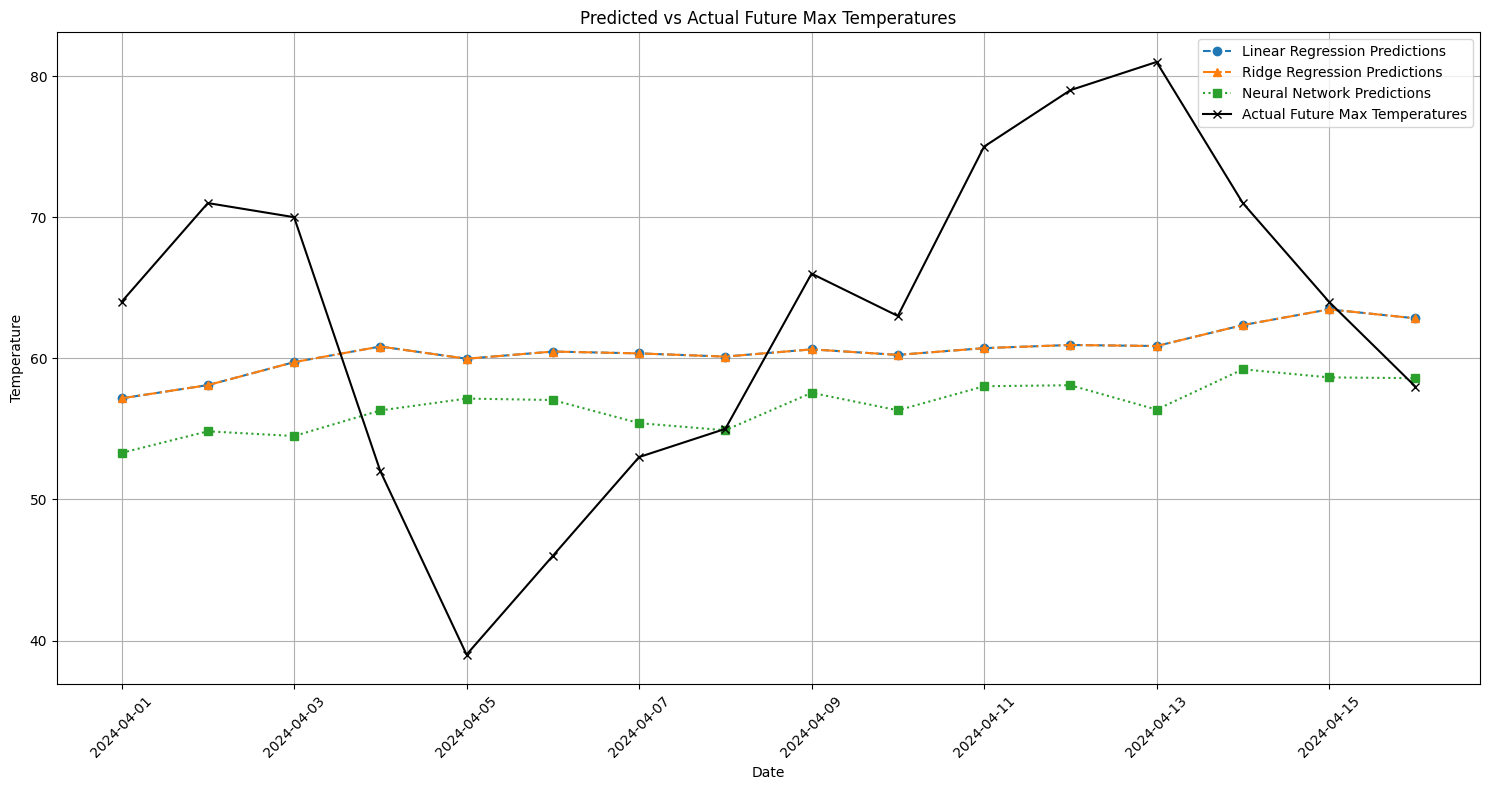

In [384]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Actual future temperatures for comparison (updated to include seven values)
actual_future_temps = [64, 71, 70, 52, 39, 46, 53, 55, 66, 63, 75, 79, 81, 71, 64, 58]  # Example values, adjust as per your actual data

# Combine original and future data
#combined_data = pd.concat([filtered_data, future_data[:-1]])  # Exclude the last row without a target

# Split features and target
X = combined_data[['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']]  # All features except target 
#X = combined_data[['temp_max', 'temp_min']]
y = combined_data['target']

# Define the number of repetitions for averaging results
n_repeats = 1

# Initialize metrics storage
metrics = []

for i in range(n_repeats):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(1000))

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    
    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_scaled, y_train)
    
    # Neural Network
    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict future data
    future_data_scaled = scaler.transform(X[-16:])  # Scale last 7 days data for prediction
    future_preds_linear = linear_model.predict(future_data_scaled)
    future_preds_ridge = ridge_model.predict(future_data_scaled)
    future_preds_nn = nn_model.predict(future_data_scaled).flatten()

    metrics.append({
        'linear': future_preds_linear,
        'ridge': future_preds_ridge,
        'nn': future_preds_nn
    })

# Calculate average predictions
avg_preds = {key: np.mean([metric[key] for metric in metrics], axis=0) for key in metrics[0].keys()}

# Plotting the results
plt.figure(figsize=(15, 8))
dates = pd.date_range(start=combined_data.index[-16], periods=16, freq='D')
plt.plot(dates, avg_preds['linear'], label='Linear Regression Predictions', marker='o', linestyle='--')
plt.plot(dates, avg_preds['ridge'], label='Ridge Regression Predictions', marker='^', linestyle='-.')
plt.plot(dates, avg_preds['nn'], label='Neural Network Predictions', marker='s', linestyle=':')
plt.plot(dates, actual_future_temps, label='Actual Future Max Temperatures', color='black', marker='x', linestyle='-')
plt.title('Predicted vs Actual Future Max Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [385]:
filtered_data

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,0.0,30,13,33.0
1970-01-02,0.00,0.0,0.0,33,17,34.0
1970-01-03,0.00,0.0,0.0,34,17,26.0
1970-01-04,0.07,1.4,0.0,26,19,27.0
1970-01-05,0.00,0.0,1.0,27,12,23.0
...,...,...,...,...,...,...
2024-03-26,0.05,0.0,0.0,53,32,57.0
2024-03-27,0.08,0.0,0.0,57,37,52.0
2024-03-28,0.55,0.0,0.0,52,37,58.0


In [386]:
# import pandas as pd

# # Assuming 'filtered_data' is your DataFrame and 'DATE' is set as the datetime index
# filtered_data.index = pd.to_datetime(filtered_data.index)  # Make sure index is datetime

# # Define the columns to apply the expanding mean
# columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

# # Add month and day averages for each specified column
# for col in columns:
#     # Month average: group by each month across all years
#     filtered_data[f"month_avg_{col}"] = filtered_data[col].groupby(filtered_data.index.month).expanding().mean().values

#     # Day of year average: group by each day of the year across all years
#     filtered_data[f"day_avg_{col}"] = filtered_data[col].groupby(filtered_data.index.dayofyear).expanding().mean().values

# # Display the updated DataFrame to verify the new columns
# print(filtered_data)


In [387]:
filtered_data

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,0.0,30,13,33.0
1970-01-02,0.00,0.0,0.0,33,17,34.0
1970-01-03,0.00,0.0,0.0,34,17,26.0
1970-01-04,0.07,1.4,0.0,26,19,27.0
1970-01-05,0.00,0.0,1.0,27,12,23.0
...,...,...,...,...,...,...
2024-03-26,0.05,0.0,0.0,53,32,57.0
2024-03-27,0.08,0.0,0.0,57,37,52.0
2024-03-28,0.55,0.0,0.0,52,37,58.0


In [388]:
# def pct_diff(old, new):
#     """ Calculate percentage difference between the old and new values. """
#     return (new - old) / old * 100

# def compute_rolling(filtered_data, horizon, col):
#     """ Calculate rolling average and percentage difference for specified column. """
#     # Rolling average
#     label = f"rolling_{horizon}_days_avg_{col}"
#     filtered_data[label] = filtered_data[col].rolling(window=horizon).mean()

#     # Percentage difference between the current day and the rolling average
#     pct_diff_label = f"{label}_pct_diff"
#     filtered_data[pct_diff_label] = pct_diff(filtered_data[label], filtered_data[col])

#     return filtered_data

# # Columns and rolling horizons to process
# columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']
# rolling_horizons = [3, 10]

# # Apply rolling calculations
# for horizon in rolling_horizons:
#     for col in columns:
#         filtered_data = compute_rolling(filtered_data, horizon, col)

# # Display the updated DataFrame to verify the new columns
# filtered_data


In [389]:
# # Remove initial rows with NaN values which appear due to rolling window calculations
# filtered_data = filtered_data.dropna()

# # Check and replace any infinite values that might have appeared
# filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
# filtered_data.fillna(0, inplace=True)  # Replace NaNs with 0

# # Optionally, check for NaN and infinite values in the dataset to ensure cleanliness
# nan_count = filtered_data.isna().sum()
# inf_count = filtered_data.replace([np.nan], np.inf).isin([np.inf, -np.inf]).sum()

# print("NaN count in each column:", nan_count)
# print("Infinite count in each column:", inf_count)


In [390]:
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min  target
DATE                                                            
1970-01-01    0.00   0.0         0.0        30        13    33.0
1970-01-02    0.00   0.0         0.0        33        17    34.0
1970-01-03    0.00   0.0         0.0        34        17    26.0
1970-01-04    0.07   1.4         0.0        26        19    27.0
1970-01-05    0.00   0.0         1.0        27        12    23.0
...            ...   ...         ...       ...       ...     ...
2024-03-26    0.05   0.0         0.0        53        32    57.0
2024-03-27    0.08   0.0         0.0        57        37    52.0
2024-03-28    0.55   0.0         0.0        52        37    58.0
2024-03-29    0.00   0.0         0.0        58        35    60.0
2024-03-30    0.00   0.0         0.0        60        41    60.0

[19727 rows x 6 columns]


In [391]:
# Data Preparation
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']
print(X)

            precip  snow  snow_depth  temp_max  temp_min
DATE                                                    
1970-01-01    0.00   0.0         0.0        30        13
1970-01-02    0.00   0.0         0.0        33        17
1970-01-03    0.00   0.0         0.0        34        17
1970-01-04    0.07   1.4         0.0        26        19
1970-01-05    0.00   0.0         1.0        27        12
...            ...   ...         ...       ...       ...
2024-03-26    0.05   0.0         0.0        53        32
2024-03-27    0.08   0.0         0.0        57        37
2024-03-28    0.55   0.0         0.0        52        37
2024-03-29    0.00   0.0         0.0        58        35
2024-03-30    0.00   0.0         0.0        60        41

[19727 rows x 5 columns]


In [392]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
# from sklearn.pipeline import Pipeline
# from keras.models import Sequential
# import matplotlib.pyplot as plt
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# import matplotlib.dates as mdates
# from sklearn.model_selection import GridSearchCV


# # Define the number of repetitions
# n_repeats = 2  # For demonstration, let's just do one iteration

# # Data Preparation
# X = filtered_data.drop('target', axis=1)
# y = filtered_data['target']

# # Metrics storage
# metrics = {}

# for i in range(n_repeats):
#     # Random state for reproducibility on the last iteration
#     random_state = np.random.randint(10000) if i < n_repeats - 1 else 42
#     # Split data
#     X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=2/3, random_state=random_state)
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

#     # Scale data
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Linear Regression
#     linear_model = LinearRegression()
#     linear_model.fit(X_train_scaled, y_train)
#     y_pred_lr = linear_model.predict(X_test_scaled)
#     mse_lr = mean_squared_error(y_test, y_pred_lr)
#     mae_lr = mean_absolute_error(y_test, y_pred_lr)

#     # Ridge Regression
#         # Ridge Regression with Grid Search for Alpha
#     ridge_pipeline_new = Pipeline([
#         ('scaler', StandardScaler()),
#         ('ridge', Ridge())
#     ])
#     alpha_values_mew = np.logspace(-10, 10, 500)  # Adjust the range based on your specific needs
#     param_grid = {'ridge__alpha': alpha_values_mew}
#     grid_search = GridSearchCV(estimator=ridge_pipeline_new, param_grid=param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5)
#     grid_search.fit(X_train, y_train)
#     best_alpha_new = grid_search.best_params_['ridge__alpha']
#     print(f"Best alpha value for iteration {i+1}: {best_alpha_new}")

#     ridge_model_new = Ridge(alpha=1e-10)
#     ridge_model_new.fit(X_train_scaled, y_train)
#     y_pred_ridge = ridge_model_new.predict(X_test_scaled)
#     mse_ridge = mean_squared_error(y_test, y_pred_ridge)
#     mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

#     nn_model = Sequential([
#         Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(256, activation='relu'),
#         Dropout(0.2),
#         Dense(128, activation='relu'),
#         Dense(1)  # Output layer for regression
#     ])
#     nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#     history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val))
#     y_pred_nn = nn_model.predict(X_test_scaled).flatten()
#     mse_nn = mean_squared_error(y_test, y_pred_nn)
#     mae_nn = mean_absolute_error(y_test, y_pred_nn)

#     # Store metrics
#     metrics['MSE'] = [mse_lr, mse_ridge, mse_nn]
#     metrics['MAE'] = [mae_lr, mae_ridge, mae_nn]

#     # Prepare results for the last iteration
#     if i == n_repeats - 1:
#         results_df = pd.DataFrame({
#             'Actual Temperature': y_test,
#             'Linear Regression': y_pred_lr,
#             'Ridge Regression': y_pred_ridge,
#             'Neural Network': y_pred_nn
#         }, index=X_test.index).sort_index()

#     cutoff_year = pd.to_datetime("today").year - 5

# # Print metrics
# print("MSE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(*metrics['MSE']))
# print("MAE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(*metrics['MAE']))

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Progression')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [393]:
# linear_pipeline.fit(X_train, y_train)
# y_pred_lr = linear_pipeline.predict(X_test)
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# mae_lr = mean_absolute_error(y_test, y_pred_lr)
# print(f'MSE: {mse_lr}')
# print(f'MAE: {mae_lr}')

In [394]:
X

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-01-01,0.00,0.0,0.0,30,13
1970-01-02,0.00,0.0,0.0,33,17
1970-01-03,0.00,0.0,0.0,34,17
1970-01-04,0.07,1.4,0.0,26,19
1970-01-05,0.00,0.0,1.0,27,12
...,...,...,...,...,...
2024-03-26,0.05,0.0,0.0,53,32
2024-03-27,0.08,0.0,0.0,57,37
2024-03-28,0.55,0.0,0.0,52,37


In [395]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # # Split the data (if you haven't already split it)
# X = filtered_data.drop('target', axis=1)  # Assuming 'target' is your prediction target
# y = filtered_data['target']

# # Define the number of iterations for averaging the results
# n_iterations = 100

# # Arrays to store performance metrics
# mse_scores = []
# mae_scores = []

# for _ in range(n_iterations):
#     # Randomly split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(10000))
    
#     # # Define and configure the model pipeline
#     # model_pipeline = Pipeline([
#     #     ('scaler', StandardScaler()),
#     #     ('regressor', Ridge(alpha=1.0))  # Adjust alpha based on previous tuning or use GridSearchCV for tuning
#     # ])
    
#     # Fit the model
#     linear_pipeline.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred = linear_pipeline.predict(X_test)
    
    
#     # Calculate and store the metrics
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse_scores.append(mse)
#     mae_scores.append(mae)

# # Calculate the average and standard deviation of the metrics
# average_mse = np.mean(mse_scores)
# std_mse = np.std(mse_scores)
# average_mae = np.mean(mae_scores)
# std_mae = np.std(mae_scores)

# # Output the results
# print(f"Average MSE: {average_mse:.3f}, Std MSE: {std_mse:.3f}")
# print(f"Average MAE: {average_mae:.3f}, Std MAE: {std_mae:.3f}")





In [396]:
# # Output the results
# print(f"Average MSE: {average_mse:.3f}, Std MSE: {std_mse:.3f}")
# print(f"Average MAE: {average_mae:.3f}, Std MAE: {std_mae:.3f}")

# # Train model on full dataset for final visualization
# linear_pipeline.fit(X, y)
# y_pred_full = linear_pipeline.predict(X)

# # Create a DataFrame for plotting
# results_df = pd.DataFrame({
#     'Actual Temperature': y,          # Full dataset actual temperatures
#     'Linear Regression Predictions': y_pred_full  # Full dataset predictions
# }, index=X.index)

# # Plotting the results for the entire dataset
# plt.figure(figsize=(15, 8))
# plt.plot(results_df.index, results_df['Actual Temperature'], label='Actual Temperature', color='blue', linestyle='-', linewidth=2)
# plt.plot(results_df.index, results_df['Linear Regression Predictions'], label='Predicted Temperature (Linear Regression)', color='red', linestyle='--', linewidth=2)

# plt.title('Comparison of Actual and Predicted Temperatures Over Entire Dataset')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate dates for better legibility
# plt.tight_layout()
# plt.show()

In [397]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from keras.callbacks import EarlyStopping


# # Define the number of iterations
# n_iterations = 1

# # Arrays to store performance metrics
# mse_scores = []
# mae_scores = []

# # Data Preparation
# X = filtered_data.drop('target', axis=1)  # Assuming 'target' is your prediction target
# y = filtered_data['target']

# def build_enhanced_model(input_dim):
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=(input_dim,)),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(256, activation='relu'),
#         Dropout(0.2),
#         Dense(128, activation='relu'),
#         Dense(1)  # Output layer for regression
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#     return model

# for _ in range(n_iterations):
#     # Randomly split the data into training, validation, and testing sets
#     X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(10000))
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=np.random.randint(10000))

#     # Using a fixed random_state to ensure the same split across different runs
#     # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#     # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#     # Data scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
#     X_test_scaled = scaler.transform(X_test)

#     # Model training
#     nn_model = build_enhanced_model(X_train_scaled.shape[1])
#     early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
#     history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

#     # Predictions and evaluation
#     y_pred_nn = nn_model.predict(X_test_scaled).flatten()
#     mse_nn = mean_squared_error(y_test, y_pred_nn)
#     mae_nn = mean_absolute_error(y_test, y_pred_nn)

#     mse_scores.append(mse_nn)
#     mae_scores.append(mae_nn)

# # Calculate the average and standard deviation of the metrics
# average_mse = np.mean(mse_scores)
# std_mse = np.std(mse_scores)
# average_mae = np.mean(mae_scores)
# std_mae = np.std(mae_scores)

# # Print out the average results and their standard deviation
# print(f"Average MSE: {average_mse:.3f}, Std MSE: {std_mse:.3f}")
# print(f"Average MAE: {average_mae:.3f}, Std MAE: {std_mae:.3f}")



# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Progression')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


93/93 [==============================] - 0s 393us/step
Average MSE: 41.234, Std MSE: 0.000
Average MAE: 5.056, Std MAE: 0.000


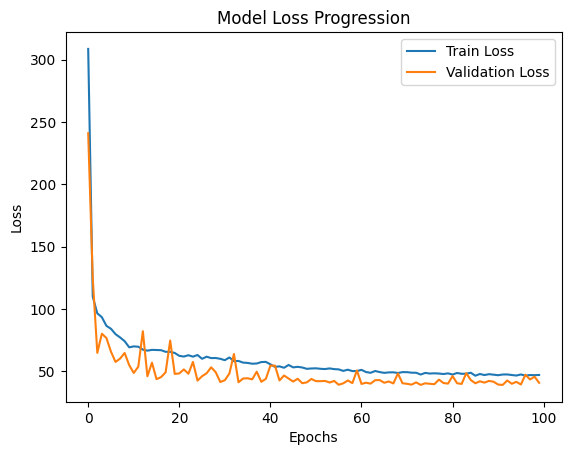

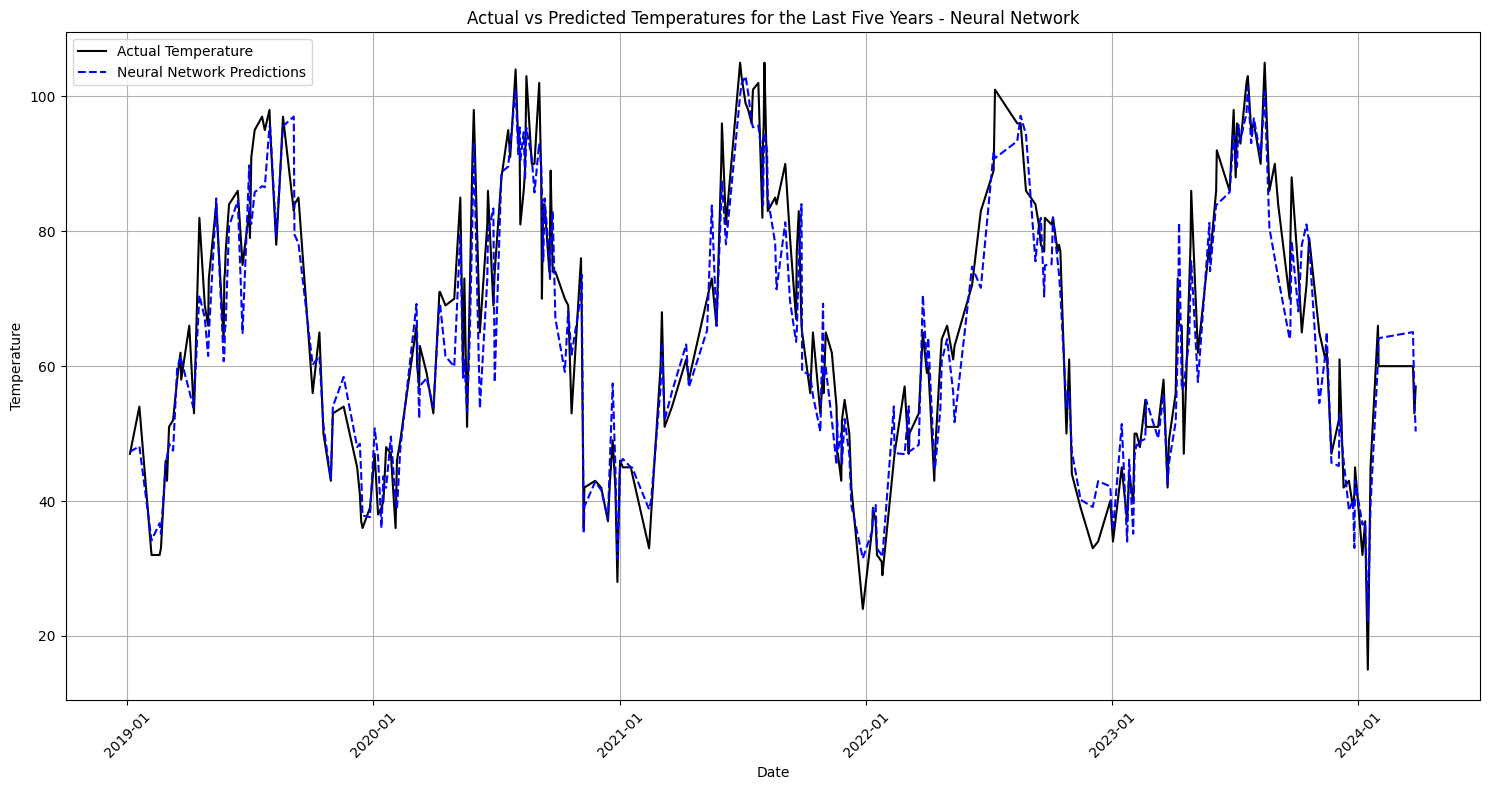

In [398]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the number of repetitions (for this type of plot, usually one full model run is sufficient)
n_repeats = 1

# Arrays to store performance metrics
mse_scores = []
mae_scores = []

# Data Preparation
X = filtered_data.drop('target', axis=1)  # Assuming 'target' is your prediction target
y = filtered_data['target']

def build_enhanced_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

for i in range(n_repeats):
    # Randomly split the data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(10000))
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=np.random.randint(10000))

    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Model training
    nn_model = build_enhanced_model(X_train_scaled.shape[1])
    history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val))

    # Predictions and evaluation
    y_pred_nn = nn_model.predict(X_test_scaled).flatten()
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    mae_nn = mean_absolute_error(y_test, y_pred_nn)

    mse_scores.append(mse_nn)
    mae_scores.append(mae_nn)

# Calculate the average and standard deviation of the metrics
average_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
average_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

# Print out the average results and their standard deviation
print(f"Average MSE: {average_mse:.3f}, Std MSE: {std_mse:.3f}")
print(f"Average MAE: {average_mae:.3f}, Std MAE: {std_mae:.3f}")



plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Create DataFrame for plotting
results_df = pd.DataFrame({
    'Actual Temperature': y_test,
    'Neural Network Predictions': y_pred_nn
}, index=X_test.index)

# Ensure data is sorted by date for plotting
results_df.sort_index(inplace=True)

# Determine the cut-off year for the last five years
cutoff_year = pd.to_datetime("today").year - 5

# Filter results for the last five years
results_df = results_df[results_df.index.year >= cutoff_year]

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(results_df.index, results_df['Actual Temperature'], label='Actual Temperature', color='black', linestyle='-')
plt.plot(results_df.index, results_df['Neural Network Predictions'], label='Neural Network Predictions', color='blue', linestyle='--')
plt.title('Actual vs Predicted Temperatures for the Last Five Years - Neural Network')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
